# Welcome to our first exercise! 

Today you will implement backpropagation on this simple two-layer neural network:

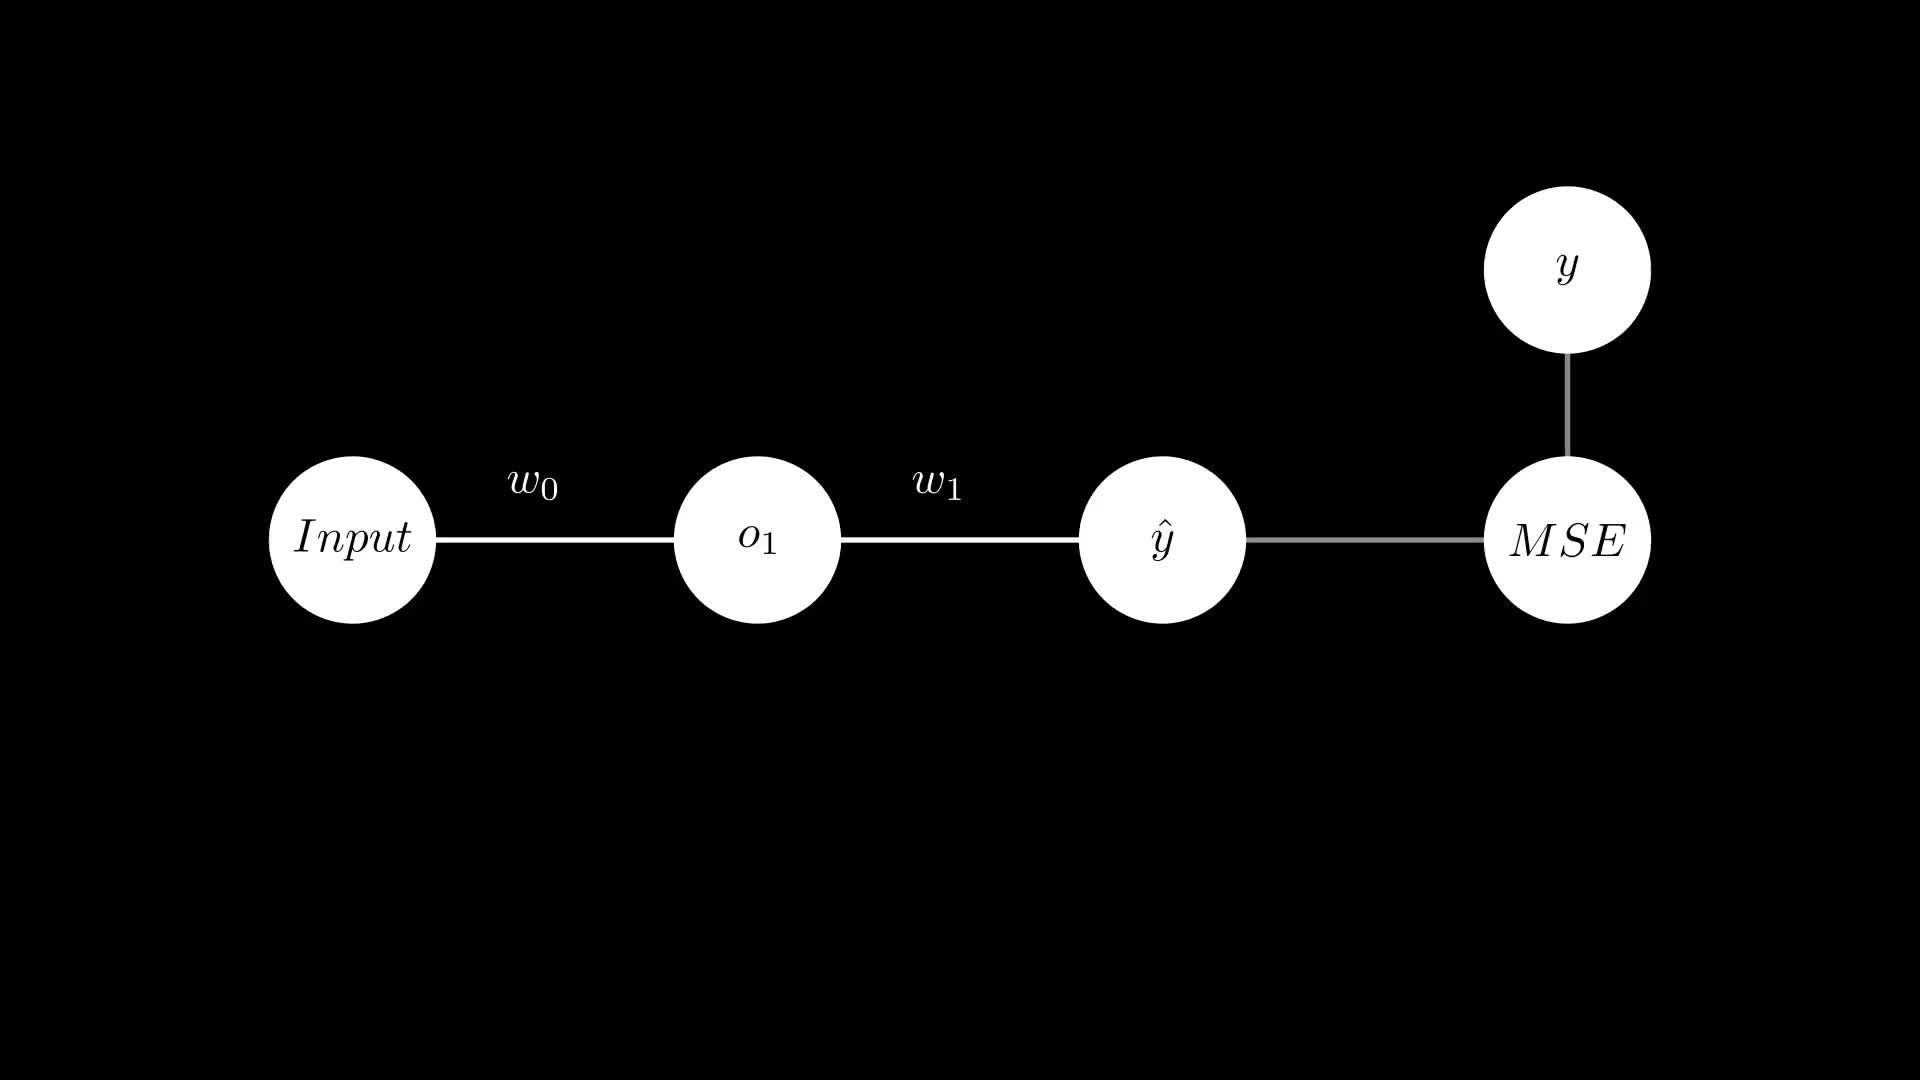

Throughout the course, we will be using the following notation:

$w_{i,j,k}$ -> This represents a weight in the $i$-th layer, connecting the $j$-th neuron to the $k$-th neuron in the subsequent layer. For today's session, we won't be explicitly using $j$ and $k$, as they are not needed.

$o_i$ -> Denotes the output of the $i$-th layer. In today's context, it will be a single numerical value.

$\hat y$ -> Represents the overall output of the entire network. Similarly, for today, it will be a single numerical value.

$x_i$ and $y_i$ -> Refer to the $i$-th training instance in our dataset and its corresponding label.



The given network can be represented by the function:
$$f(x) = (w_0 \cdot x) \cdot w_1 = o_1 \cdot w_1 = \hat y $$

The loss function between the predicted output and the actual output can be expressed as:
$$L(y_i,\hat y_i) = L(y_i,f(x_i)) = (\hat y_i - y_i )^2 $$

In the scenario where we possess a dataset with a total of n instances, the overall loss can be computed as:
$$L(y,\hat y) = \frac{1}{n} \sum_{i = 1}^{n} (\hat y_i - y_i )^2 $$


<h3>Task: Check Code</h3> 
As a warmup, I want you to go thru the code that I have written in <code>exercise_1/code</code>.

<h3>Task: Implement.</h3> 
Go into <code>exercise_1/code/single_neuron.py</code> and implement the forward pass of a single layer.

<h3>Task: Implement.</h3>
Go into <code>exercise_1/code/mse.py</code> and implement the forward pass of a MSE loss function.

In [2]:
from tests.test import SingleNeuronTest_Forward,MSETest_Forward

t1 = SingleNeuronTest_Forward()
t2 = MSETest_Forward()

t1()
t2()

SingleNeuronTest_Forward passed.
MSETest_Forward passed.


## Backpropagation

The backpropagation algorithm allows the information from the loss flowing backward through the network in order to compute the gradient of the loss function $L$ w.r.t the weights $w$ of the model. 

The key idea of backpropagation is decomposing the derivatives by applying the chain rule to the loss function.

$$ \frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial \hat y} \cdot \frac{\partial \hat y}{\partial w_i}$$

For our simple two single neuron layer network, considering the derivatives with respect to the variables, we have to calculate:

$$\frac{\partial L}{\partial \hat y}$$

$$\frac{\partial \hat y}{\partial w_1}$$

$$\frac{\partial o_1}{\partial w_0}$$

Where:
- $\hat y$ is the predicted output,
- $L$ is the loss function,
- $w_0$ and $w_1$ are the weights of the neurons.
- $o_1$ is the output of the first layer.


Then we can calculate the gradients:
$$ \frac{\partial L}{\partial w_2} = \frac{\partial L}{\partial \hat y} \cdot \frac{\partial \hat y}{\partial w_2}$$

$$ \frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial \hat y} \cdot \frac{\partial \hat y}{\partial w_2} \cdot \frac{\partial o_1}{\partial w_1} $$

What's important to notice is that the gradient of one layer is connected to the next by multiplying the gradient of the next layer with the partial derivative of the current layer. 

This is why we <b>backpropagate</b>, not forwardpropagate. We calculate the partial derivate of the current layer and then pass this calculated value to the previous layer, where we only need to calculate a single partial derivative and multiply it by the passed-down value. 

We will call the value passed down from a subsequent layer the <b>upstream gradient</b>.


<h3>Task: Implement.</h3> 
Go into <code>exercise_1/code/single_neuron.py</code> and implement the backward pass of a single layer.

<h3>Task: Implement.</h3> 
Go into <code>exercise_1/code/mse.py</code> and implement the backward pass of a the means squared error loss function.

In [1]:
from tests.test import MSETest_Backward, SingleNeuronTest_Backward

t1 = MSETest_Backward()
t2 = SingleNeuronTest_Backward()

t1()
t2()


MSETest_Backward passed.
SingleNeuronTest_Backward passed.


# Putting it all together.

The key to implementing neural networks is decomposing the complex problem into small subproblems we can manage independently.

<h3>Task: Check Code</h3> 
Using the SingleNeuron class that we created, I implemented the SimpleTwoLayerNetwork class. Check how the code works in <code>exercise_1/code/two_layer_network.py</code>.


Let's say that we want to approximate a function with this network that looks like this:
$$f(x) = (2 \cdot x) \cdot 5$$
So we want to get $w_0 \approx 2$ and $w_1 \approx 5$. 

We can generate some artificial training data because we are solving a very simple problem. Note that this is not possible in real-world scenarios.


In [1]:
import numpy as np
import random

# Set a random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

def generate_training_data(num_samples):
    training_data = []
    for _ in range(num_samples):
        x = random.randint(1, 100)  # Generate a random integer between 1 and 100
        y = (2 * x) * 5  # Calculate the label based on f(x) = (2 * x) * 5
        data_point = {'x': x, 'y': y}
        training_data.append(data_point)
    return training_data

NUM_TRAIN_SAMPLES = 10

train_data = generate_training_data(NUM_TRAIN_SAMPLES)

train_data

[{'x': 82, 'y': 820},
 {'x': 15, 'y': 150},
 {'x': 4, 'y': 40},
 {'x': 95, 'y': 950},
 {'x': 36, 'y': 360},
 {'x': 32, 'y': 320},
 {'x': 29, 'y': 290},
 {'x': 18, 'y': 180},
 {'x': 95, 'y': 950},
 {'x': 14, 'y': 140}]

Epoch 1/10, Average Loss: 286948.52171478403
w_1:0.486379672216 w_2:0.025739085216
Epoch 2/10, Average Loss: 286241.9611350567
w_1:6.271778445178665 w_2:0.09543747602290185
Epoch 3/10, Average Loss: 253635.40180956377
w_1:23.827831577659335 w_2:0.30694038191987233
Epoch 4/10, Average Loss: 20707.26381902079
w_1:28.592329385225348 w_2:0.3643396802607727
Epoch 5/10, Average Loss: 499.7583570734778
w_1:28.370284470716122 w_2:0.3616646402444345
Epoch 6/10, Average Loss: 194.77472400468395
w_1:28.335898502446334 w_2:0.36125038242940855
Epoch 7/10, Average Loss: 160.30530819795754
w_1:28.328109134530933 w_2:0.3611565416363342
Epoch 8/10, Average Loss: 152.96822855105384
w_1:28.32620740175437 w_2:0.3611336309054628
Epoch 9/10, Average Loss: 151.203313858353
w_1:28.325734750972966 w_2:0.36112793674328486
Epoch 10/10, Average Loss: 150.7662740995834
w_1:28.325616761139393 w_2:0.36112651528525674


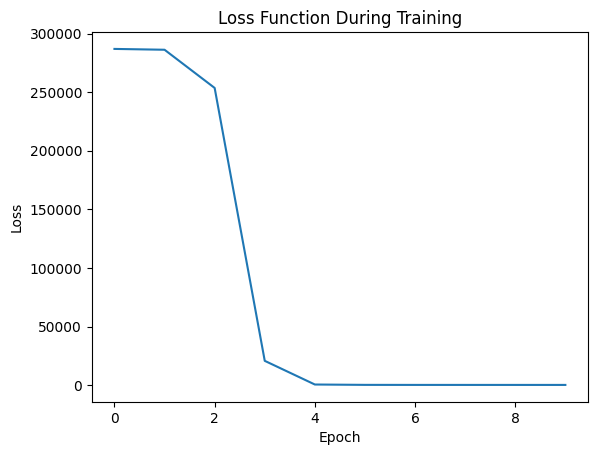

In [2]:
from code.mse import MSE
from code.two_layer_network import SimpleTwoLayerNetwork
import matplotlib.pyplot as plt

w_1 = 0.01  # Initialize the first weight
w_2 = 0.02 # Initialize the second weight

# Create an instance of SimpleTwoLayerNetwork
network = SimpleTwoLayerNetwork(w_1, w_2)

# Hyperparameters
learning_rate = 0.0001
num_epochs = 10

loss_function = MSE()

losses = []

# Training loop
for epoch in range(num_epochs):
    total_loss = 0.0
    
    gw_1 = 0
    gw_2 = 0
    
    for data_point in train_data:

        x = data_point['x']
        y_true = data_point['y']

        # Forward pass
        y_pred = network.forward(x)
         
         # Compute loss 
        loss = loss_function.forward(y_pred, y_true)
        total_loss += loss

        # Backward pass
        dy = loss_function.backward(y_pred, y_true, NUM_TRAIN_SAMPLES)
        local_gw_1, local_gw_2 = network.backward(dy)
        
        gw_1 += local_gw_1
        gw_2 += local_gw_2
        
    gw_1 /= NUM_TRAIN_SAMPLES
    gw_2 /= NUM_TRAIN_SAMPLES

    # Update weights using gradient descent
    network.layer_1.w -= learning_rate * gw_1
    network.layer_2.w -= learning_rate * gw_2
    
    gw_1 = 0
    gw_2 = 0
    
    avg_loss = total_loss / NUM_TRAIN_SAMPLES
    losses.append(avg_loss)
    

    learning_rate /= 4
    
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss}")
    print(f"w_1:{network.layer_1.w} w_2:{network.layer_2.w}")
    
    
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function During Training')
plt.show()

# Result

This kinda worked, but not as one might expect!

First the $w_1 \approx 28.3$ and $w_2 \approx 0.36$. Why?

$$f(x) = (2 \cdot x) \cdot 5 = 10 \cdot x$$

Backpropagation calculated the weights so $w_1 \cdot w_2 \approx 10$.

I also had to add a few things to the code that I still need to discuss.

First, I am reducing the learning rate at every epoch. If you would remove this, the weights will blow up.
Second, I initialized the weights to small values. If you initialize them to larger values, they would probably blow up during training.

# Takeaways

<b>1: </b> Joining simple layers like in this exercise makes no sense because we could represent them with a single layer. We must add <b>activation functions</b> between the layers. We will discuss more about them in the upcoming episodes.


<b>2: </b> Calculating gradients is a challenge! Unfortunately, there are other things we must worry about during training. We have to initialize the weights properly, find proper values for the learning rate, and many more.


<b>3: </b> The key to implementing neural networks is to separate the problem into manageable subtasks! This can easily be done with object-oriented programming.
